## Text analysis of Seneca's Letters

Seneca was a famous Roman stateman, philosopher, and Stoic (first century CE). Seneca has, perhaps, the largest body of stoic writings that has survived from ancient times. His letters to Lucilius are some of his most famous works and provide an interesting subject of study using unsupervied machine learning.



__Moral letters to Lucilius__ (Epistulae morales ad Lucilium) <br>
by Seneca, translated by Richard Mott Gummere <br>
Loeb Classical Library edition; volume 1 published 1917; volume 2 published 1920; volume 3 published 1925 <br>
Letters collected from https://en.wikisource.org/wiki/Moral_letters_to_Lucilius 

In [176]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, ward

pd.options.display.max_colwidth = 300

In [177]:
letters = pd.read_csv("../data/letters.csv", index_col="Letter")
letters = letters.iloc[:20]

In [178]:
letters.shape

(20, 2)

In [179]:
letters.tail()

,Title,Text
Letter,,
16,"On philosophy, the guide of life","1. It is clear to you, I am sure, Lucilius, that no man can live a happy life, or even a supportable life, without the study of wisdom; you know also that a happy life is reached when our wisdom is brought to completion, but that life is at least endurable even when our wisdom is only begun. Thi..."
17,On philosophy and riches,"1. Cast away everything of that sort, if you are wise; nay, rather that you may be wise; strive toward a sound mind at top speed and with your whole strength. If any bond holds you back, untie it, or sever it. ""But,"" you say, ""my estate delays me; I wish to make such disposition of it that it ma..."
18,On festivals and fasting,"1. It is the month of December, and yet the city is at this very moment in a sweat. License is given to the general merrymaking. Everything resounds with mighty preparations, - as if the Saturnalia differed at all from the usual business day! So true it is that the difference is nil, that I rega..."
19,On worldliness and retirement,"1. I leap for joy whenever I receive letters from you. For they fill me with hope; they are now not mere assurances concerning you, but guarantees. And I beg and pray you to proceed in this course; for what better request could I make of a friend than one which is to be made for his own sake? If..."
20,On practising what you preach,"1. If you are in good health and if you think yourself worthy of becoming at last your own master, I am glad. For the credit will be mine, if I can drag you from the floods in which you are being buffeted without hope of emerging. This, however, my dear Lucilius, I ask and beg of you, on your pa..."


In [180]:
num = []
for i in range(1000):
    num.append(str(i))

In [181]:
my_stopwords = ENGLISH_STOP_WORDS.union(num)
tfidf_vec = TfidfVectorizer(use_idf=False, 
                            stop_words=my_stopwords, 
                            max_features=5000,
                           )

In [182]:
tfidf_mat = tfidf_vec.fit_transform(letters['Text'])

In [183]:
tfidf_df = pd.DataFrame(tfidf_mat.A, columns=tfidf_vec.get_feature_names(), index=letters.index)
tfidf_df

,abandon,abandoned,abilities,ability,abjured,able,abode,abroad,abrupt,abruptly,...,year,years,yes,yield,yields,yoke,yonder,young,youth,zeno
Letter,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.063500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.060412,0.000000,0.000000,0.060412,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.036711,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.036711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.044151,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.044151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056077
7,0.000000,0.000000,0.07943,0.000000,0.000000,0.000000,0.000000,0.039715,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039715,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.000000,0.000000,0.043113,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.043113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.018427,0.000000,0.036854,0.018427,0.000000,0.000000


#### What words have the highest frequency? 
(we have not weigthed by idf yet)

In [184]:
tfidf_df.sum().sort_values(ascending=False).head(15)

man       4.194218
men       3.051229
life      2.172088
day       1.711498
shall     1.575446
things    1.515091
mind      1.432753
fear      1.344547
say       1.319175
great     1.300121
good      1.240248
words     1.157382
know      1.155091
time      1.153883
let       1.116394
dtype: float64

#### Now we will weight by idf

In [185]:
tfidf_vec.use_idf = True

In [186]:
tfidf_mat = tfidf_vec.fit_transform(letters['Text'])

In [187]:
tfidf_df = pd.DataFrame(tfidf_mat.A, columns=tfidf_vec.get_feature_names(), index=letters.index)
tfidf_df

,abandon,abandoned,abilities,ability,abjured,able,abode,abroad,abrupt,abruptly,...,year,years,yes,yield,yields,yoke,yonder,young,youth,zeno
Letter,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.065443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.062518,0.000000,0.000000,0.07882,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.040250,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.032481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.045453,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.036680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080398
7,0.000000,0.000000,0.108919,0.000000,0.000000,0.000000,0.00000,0.047871,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034102,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.043430,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.052541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.028601,0.000000,0.057201,0.017910,0.000000,0.000000


#### and see which words have the highest tf-idf values

In [191]:
tfidf_df.sum().sort_values(ascending=False).head(15)

man           1.812580
men           1.423465
life          1.195305
day           0.934202
poverty       0.899575
friend        0.855063
philosophy    0.832433
fear          0.822613
shall         0.817332
things        0.793242
mind          0.778962
let           0.756792
say           0.733356
friendship    0.725980
great         0.715894
dtype: float64

### Hierarchical Clustering

In [198]:
dist = 1 - cosine_similarity(X=tfidf_mat)

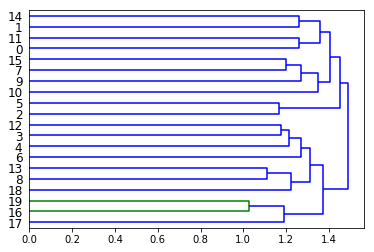

In [199]:
fig, ax = plt.subplots(1,1)
ax = dendrogram(ward(dist), orientation='right')
plt.show()